In [52]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        # 输入图像channel为1，第一层输出channel为6， 卷积核大小为5*5
        # 定义卷积层
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)

        # 全连接层
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        # 做max-pooling
        x = F.max_pool2d(x, (2,2))

        x = self.conv2(x)
        x = F.relu(x)
        # 做max-pooling
        x = F.max_pool2d(x, (2,2))

        x = x.view(-1, self.num_flat_features(x))

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # 除去批处理维度的其他所有维度
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = MyModel()
print(net)

        



MyModel(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [53]:
params = list(net.parameters())
print(len(params))

for i in range(len(params)):
    print('net_{}:'.format(i))
    print(params[i].size())  # conv1's .weight

10
net_0:
torch.Size([6, 1, 5, 5])
net_1:
torch.Size([6])
net_2:
torch.Size([16, 6, 5, 5])
net_3:
torch.Size([16])
net_4:
torch.Size([120, 400])
net_5:
torch.Size([120])
net_6:
torch.Size([84, 120])
net_7:
torch.Size([84])
net_8:
torch.Size([10, 84])
net_9:
torch.Size([10])


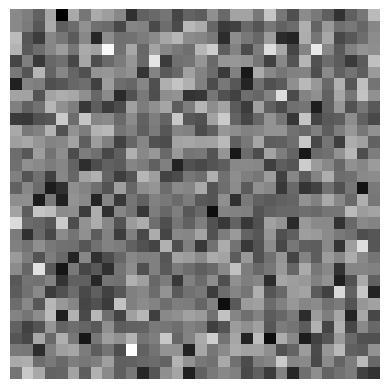

In [54]:
# 随机生成一张32*32的图片,1张，1个channel，32*32 像素点的图片

input = torch.randn(1, 1, 32,32)

# 看看这张随机生成的图片
import matplotlib.pyplot as plt

# 将Tensor转换为NumPy数组，并调整形状
image = input.squeeze().numpy()

# 使用matplotlib库显示图片
plt.imshow(image, cmap='gray')
plt.axis('off')  # 不显示坐标轴
plt.show()

In [55]:
# 将图片输入到网络中

out = net(input)
print(out)

tensor([[ 0.0533, -0.0374, -0.0356, -0.1500, -0.0564,  0.1361, -0.0900, -0.0234,
          0.0130, -0.1086]], grad_fn=<AddmmBackward0>)


In [56]:
# 清楚缓存的参数的梯度
# net.zero_grad()

# 进行梯度更新
# 在 PyTorch 中，当调用张量的 backward() 函数进行反向传播时，
# 可以传递一个张量作为参数，该张量用于指定梯度的权重（权重的形状必须与输出张量的形状相同）。
# 这个权重张量在计算梯度时对梯度的计算起到了缩放的作用。
# out.backward(torch.rand(1, 10))

In [57]:
# 在实际的训练中，不会直接对网络生成的结果做梯度更新
# 而是选择更有评价标准的Loss函数
target = torch.randn(1,10)

# view操作是对tensor进行reshape，-1表示第二个维度将
# 根据大小自动调整
target = target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(out, target)
print(loss)

tensor(0.7677, grad_fn=<MseLossBackward0>)


In [58]:
# net.zero_grad()     # 清零所有参数(parameter）的梯度缓存

# print('conv1.bias.grad before backward')
# print(net.conv1.bias.grad)

# loss.backward()

# print('conv1.bias.grad after backward')
# print(net.conv1.bias.grad)

In [59]:
import torch.optim as optim

# 创建优化器(optimizer）
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 在训练的迭代中：
loss = criterion(out, target)
loss.backward()
print('conv1.bias befor opt')
print(net.conv1.bias)
print('conv1.bias.grad befor opt')
print(net.conv1.bias.grad)

optimizer.step()    # 更新参数
print('conv1.bias after opt')
print(net.conv1.bias)

conv1.bias befor opt
Parameter containing:
tensor([ 0.1593, -0.1954, -0.1997,  0.0782, -0.1261,  0.0591],
       requires_grad=True)
conv1.bias.grad befor opt
tensor([-0.0021,  0.0097,  0.0098, -0.0138,  0.0092,  0.0009])
conv1.bias after opt
Parameter containing:
tensor([ 0.1593, -0.1955, -0.1998,  0.0783, -0.1262,  0.0590],
       requires_grad=True)
